<a href="https://colab.research.google.com/github/MuditIsOP/BBD/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

gdown.download('https://drive.google.com/uc?id=1whvsCJN3yEGLHgSRfiMIOhMiA6ikC-mj', output='train.csv', quiet=False)

gdown.download('https://drive.google.com/uc?id=17OZ_Jkw0eWpHun4mGlI1vPP3GTJZLBDP', output='test.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1whvsCJN3yEGLHgSRfiMIOhMiA6ikC-mj
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 3.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=17OZ_Jkw0eWpHun4mGlI1vPP3GTJZLBDP
To: /content/test.csv
100%|██████████| 28.6k/28.6k [00:00<00:00, 19.5MB/s]


'test.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
y = train['Survived']
train_features = train.drop('Survived', axis=1)

In [ ]:
full = pd.concat([train_features, test], axis=0, ignore_index=True)

In [ ]:
full.shape

(1309, 11)

In [ ]:
full.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [ ]:
full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full['Age'] = full['Age'].fillna(np.floor(full['Age'].median()))
full['Fare'] = full['Fare'].fillna(full['Fare'].median())
full['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])

In [ ]:
full['HasCabin'] = full['Cabin'].notnull().astype(int)
full.drop(columns=['Cabin'], inplace=True)

In [ ]:
full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
full['FamilySize'] = full['SibSp'] + full['Parch'] + 1

In [ ]:
full['IsAlone'] = (full['FamilySize'] == 1).astype(int)

In [ ]:
eda_full = full.copy()
eda_full.loc[:len(train)-1, 'Survived'] = train['Survived'].values
eda_full.loc[:len(train)-1, 'Survived'] = train['Survived'].values
eda_df = eda_full[eda_full['Survived'].notna()]

In [ ]:
full = pd.get_dummies(full, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
full.drop(columns=['Name','Ticket','PassengerId'], inplace=True)

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Age         1309 non-null   float64
 2   SibSp       1309 non-null   int64  
 3   Parch       1309 non-null   int64  
 4   Fare        1309 non-null   float64
 5   HasCabin    1309 non-null   int64  
 6   FamilySize  1309 non-null   int64  
 7   IsAlone     1309 non-null   int64  
 8   Sex_male    1309 non-null   bool   
 9   Embarked_Q  1309 non-null   bool   
 10  Embarked_S  1309 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 85.8 KB


In [ ]:
full['Fare'] = np.clip(
    full['Fare'],
    full['Fare'].quantile(0.01),
    full['Fare'].quantile(0.99)
)

In [ ]:
num_cols = ['Age','Fare','FamilySize']
scaler = StandardScaler()
full[num_cols] = scaler.fit_transform(full[num_cols])

In [ ]:
X_train_full = full.iloc[:len(train)]
X_test_final = full.iloc[len(train):]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y,
    test_size=0.2,
    random_state=69
)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       112
           1       0.74      0.76      0.75        67

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



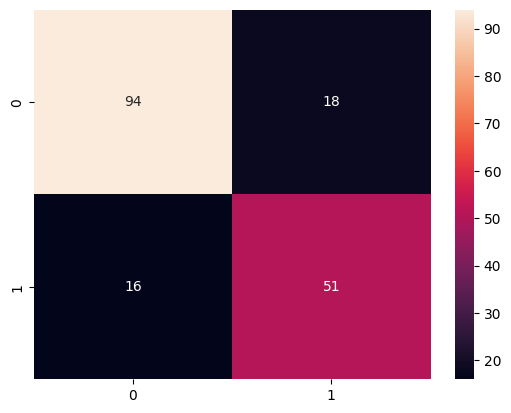

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
gender_survival = eda_df.groupby('Sex')['Survived'].mean()
print(gender_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


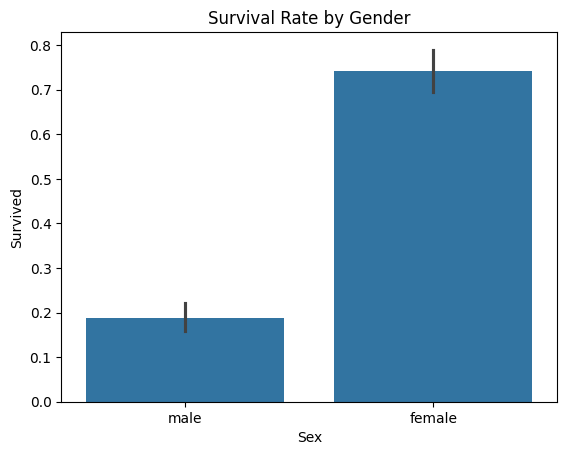

In [ ]:
sns.barplot(x='Sex', y='Survived', data=eda_df)
plt.title("Survival Rate by Gender")
plt.show()

In [ ]:
class_survival = eda_df.groupby('Pclass')['Survived'].mean()
print(class_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


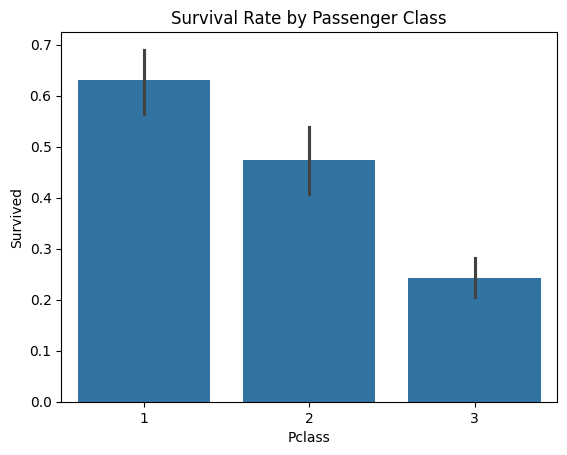

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=eda_df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [ ]:
eda_df['AgeGroup'] = pd.cut(
    eda_df['Age'],
    bins=[0, 12, 18, 40, 60, 100],
    labels=['Child','Teen','Adult','Middle-aged','Senior']
)

/tmp/ipython-input-3216919730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['AgeGroup'] = pd.cut(


In [ ]:
age_survival = eda_df.groupby('AgeGroup')['Survived'].mean()
print(age_survival)

AgeGroup
Child          0.579710
Teen           0.428571
Adult          0.360465
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


/tmp/ipython-input-1045424341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = eda_df.groupby('AgeGroup')['Survived'].mean()


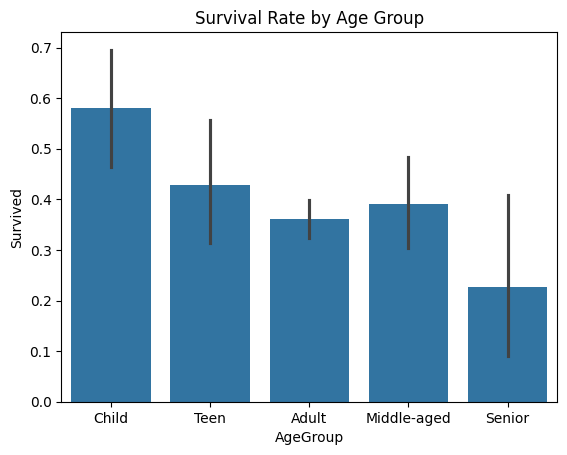

In [ ]:
sns.barplot(x='AgeGroup', y='Survived', data=eda_df)
plt.title("Survival Rate by Age Group")
plt.show()

In [ ]:
eda_df['FareGroup'] = pd.qcut(eda_df['Fare'], 4, labels=['Low','Mid','High','Very High'])

/tmp/ipython-input-492723697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['FareGroup'] = pd.qcut(eda_df['Fare'], 4, labels=['Low','Mid','High','Very High'])


In [ ]:
fare_survival = eda_df.groupby('FareGroup')['Survived'].mean()
print(fare_survival)


FareGroup
Low          0.197309
Mid          0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64


/tmp/ipython-input-631003929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = eda_df.groupby('FareGroup')['Survived'].mean()


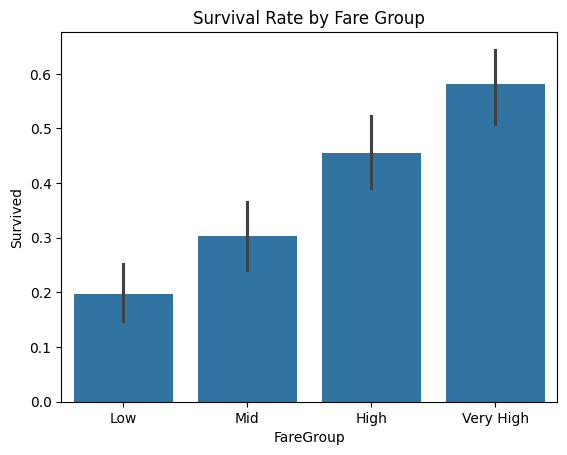

In [ ]:
sns.barplot(x='FareGroup', y='Survived', data=eda_df)
plt.title("Survival Rate by Fare Group")
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


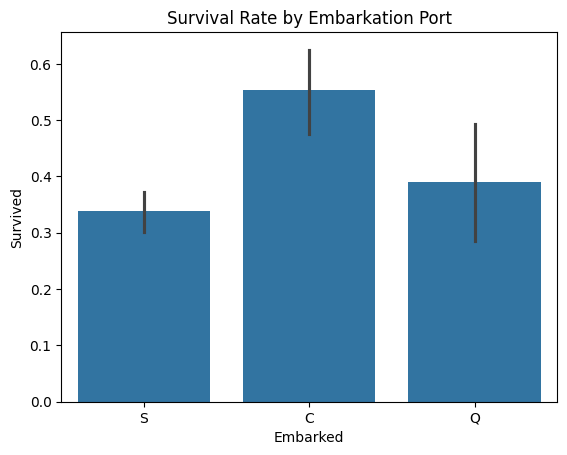

In [ ]:
embarked_survival = eda_df.groupby('Embarked')['Survived'].mean()
print(embarked_survival)
sns.barplot(x='Embarked', y='Survived', data=eda_df)
plt.title("Survival Rate by Embarkation Port")
plt.show()

HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


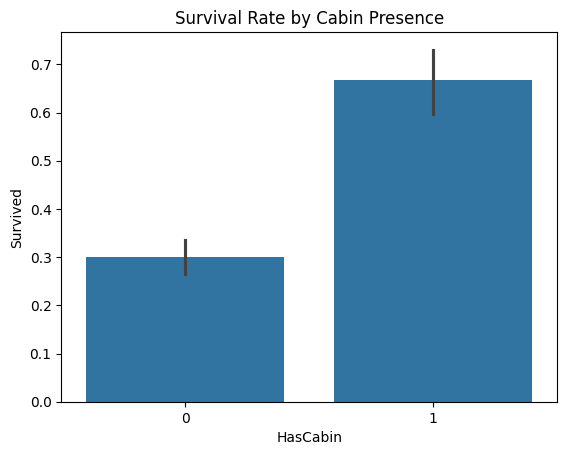

In [ ]:
hascabin_survival = eda_df.groupby('HasCabin')['Survived'].mean()
print(hascabin_survival)
sns.barplot(x='HasCabin', y='Survived', data=eda_df)
plt.title("Survival Rate by Cabin Presence")
plt.show()

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


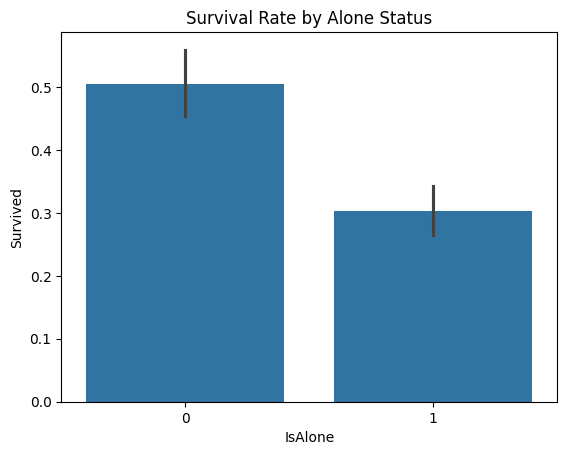

In [ ]:
isalone_survival = eda_df.groupby('IsAlone')['Survived'].mean()
print(isalone_survival)
sns.barplot(x='IsAlone', y='Survived', data=eda_df)
plt.title("Survival Rate by Alone Status")
plt.show()

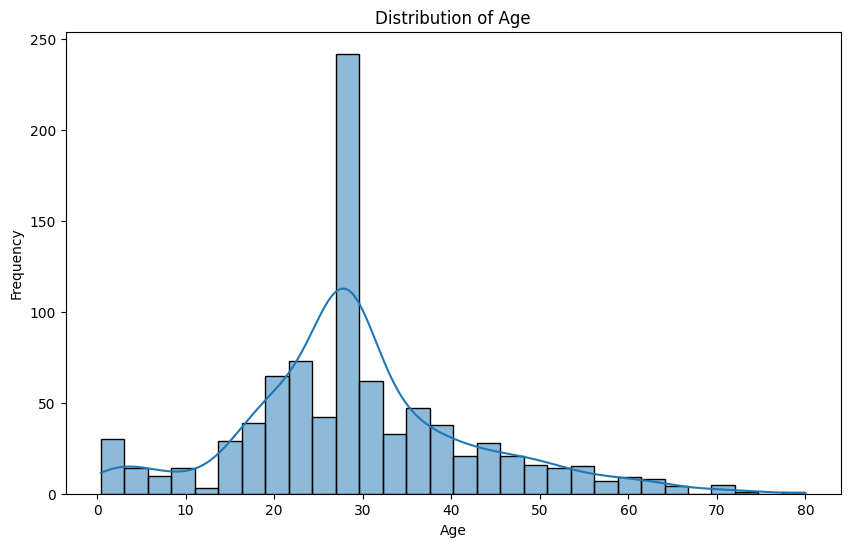

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

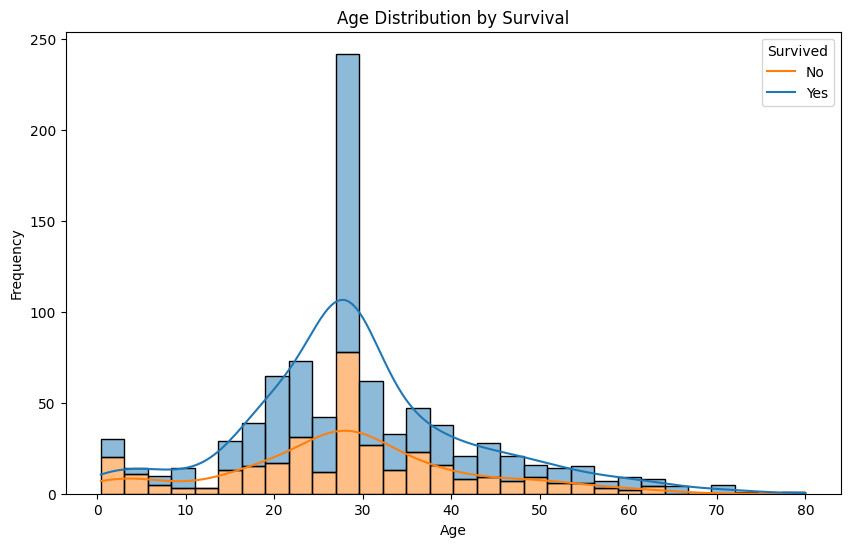

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

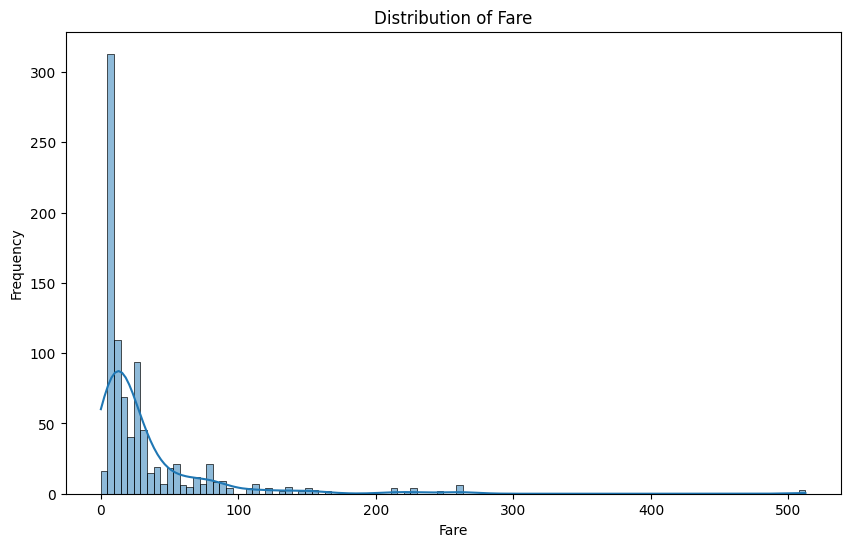

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

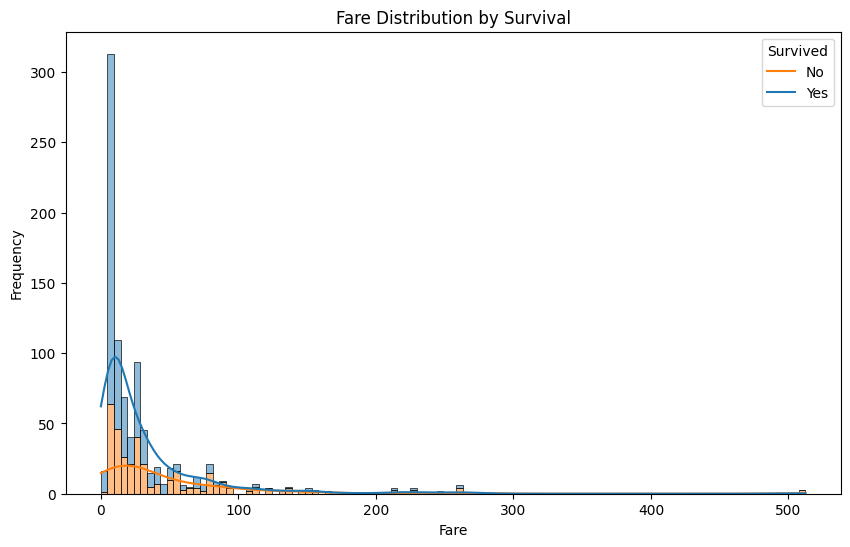

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

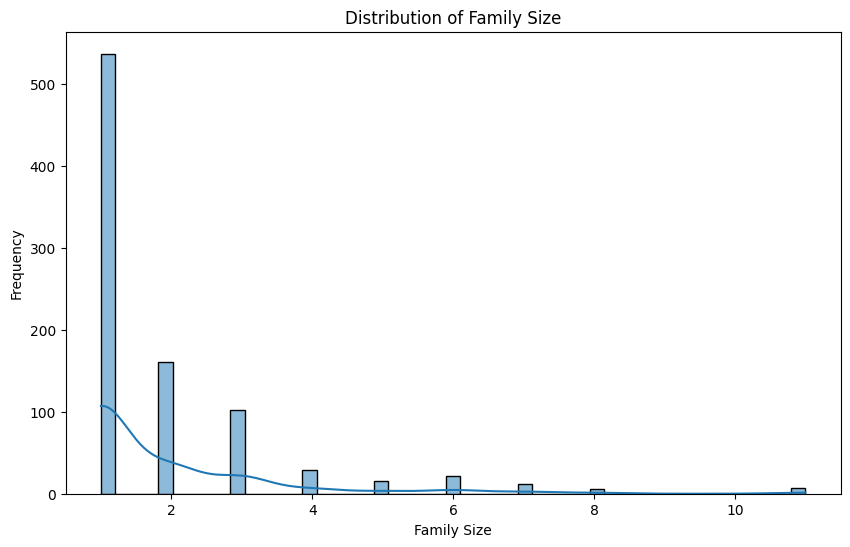

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['FamilySize'], kde=True)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

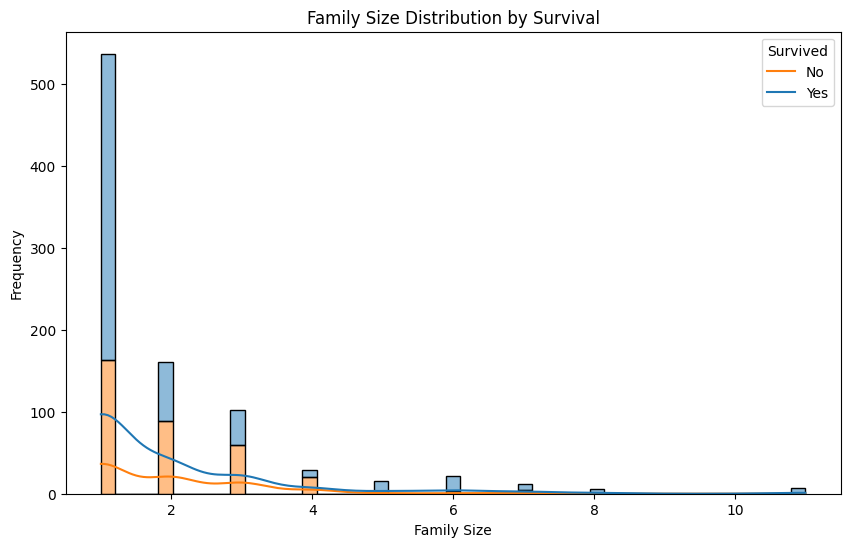

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df, x='FamilySize', hue='Survived', kde=True, multiple='stack')
plt.title('Family Size Distribution by Survival')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

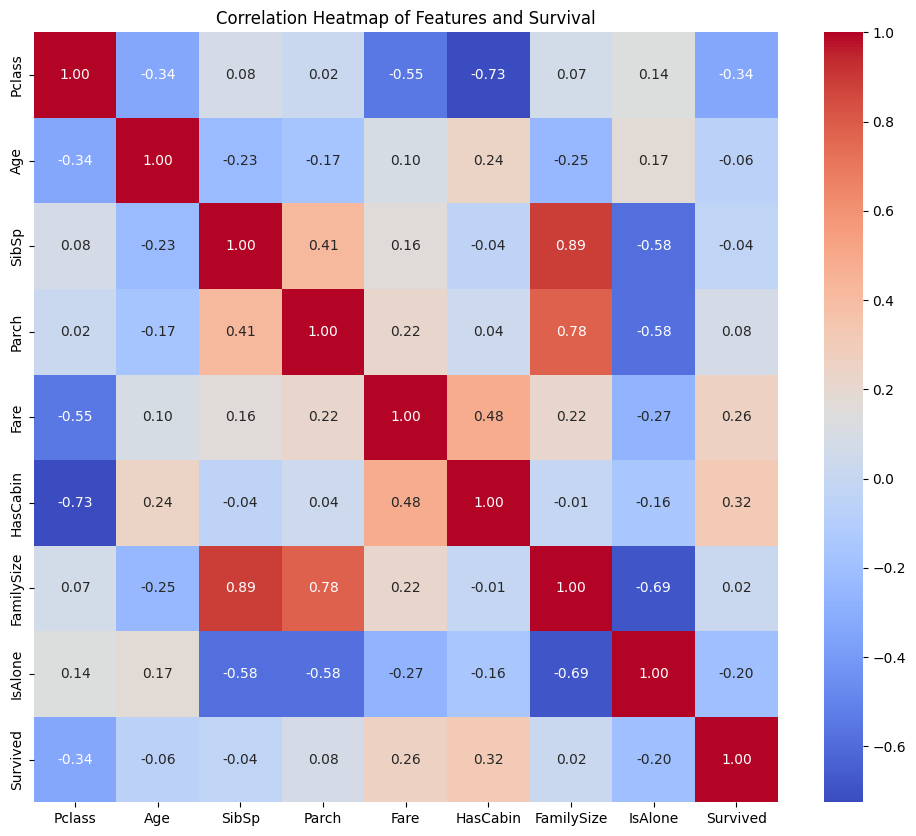

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(eda_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'AgeGroup', 'FareGroup']).corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Survival')
plt.show()

In [ ]:
survival_rates_dict = {
    'Sex': gender_survival,
    'Pclass': class_survival,
    'AgeGroup': age_survival,
    'FareGroup': fare_survival,
    'Embarked': embarked_survival,
    'HasCabin': hascabin_survival,
    'IsAlone': isalone_survival
}

consolidated_survival = pd.concat(survival_rates_dict)
consolidated_survival_df = consolidated_survival.reset_index()
consolidated_survival_df.columns = ['Feature_Category', 'Feature_Value', 'Survival_Rate']


In [ ]:
consolidated_survival_df['Survival_Rate'] = consolidated_survival_df['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(consolidated_survival_df)

   Feature_Category Feature_Value Survival_Rate
0               Sex        female        74.20%
1               Sex          male        18.89%
2            Pclass             1        62.96%
3            Pclass             2        47.28%
4            Pclass             3        24.24%
5          AgeGroup         Child        57.97%
6          AgeGroup          Teen        42.86%
7          AgeGroup         Adult        36.05%
8          AgeGroup   Middle-aged        39.06%
9          AgeGroup        Senior        22.73%
10        FareGroup           Low        19.73%
11        FareGroup           Mid        30.36%
12        FareGroup          High        45.50%
13        FareGroup     Very High        58.11%
14         Embarked             C        55.36%
15         Embarked             Q        38.96%
16         Embarked             S        33.90%
17         HasCabin             0        29.99%
18         HasCabin             1        66.67%
19          IsAlone             0       